In [0]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [0]:
def outliers_z_score(ys):
    threshold = 1.5

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

def outliers_modified_z_score(ys):
    threshold = 2

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [0]:
sns.set(style="whitegrid", color_codes=True)

# Treino CPU

In [4]:
from google.colab import files
uploaded = files.upload()
mu = pd.read_csv('train_cpu2.csv', sep=',', encoding='utf-8')

Saving train_cpu2.csv to train_cpu2.csv


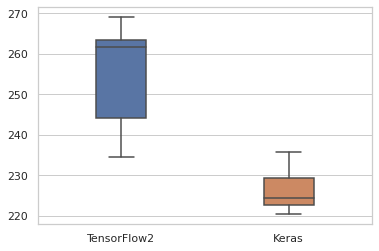

In [5]:
sns.boxplot(data=mu, width=0.3, whis=1.5)

KS Test

In [6]:
tf = mu.TensorFlow2
print(stats.kstest(tf, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)


In [7]:
pt = mu.Keras
print(stats.kstest(pt, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)


In [8]:
print(stats.wilcoxon(tf,pt))

WilcoxonResult(statistic=0.0, pvalue=3.896559845095909e-18)


# Treino GPU

In [9]:
from google.colab import files
uploaded = files.upload()
tau = pd.read_csv('train_gpu2.csv', sep=',', encoding='utf-8')

Saving train_gpu2.csv to train_gpu2.csv


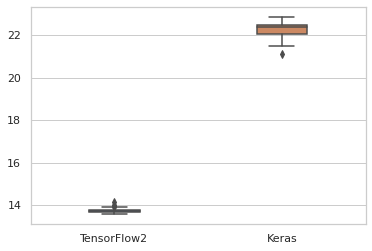

In [10]:
sns.boxplot(data=tau, width=0.3, whis=1.5)

KS TEST

In [11]:
tf = tau.TensorFlow2
print(stats.kstest(tf, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)


In [12]:
pt = tau.Keras
print(stats.kstest(pt, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)


In [13]:
print(stats.wilcoxon(tf,pt))

WilcoxonResult(statistic=0.0, pvalue=3.896559845095909e-18)


# Test CPU

In [14]:
from google.colab import files
uploaded = files.upload()
cpu_test = pd.read_csv('test_cpu2.csv', sep=',', encoding='utf-8')

Saving test_cpu2.csv to test_cpu2.csv


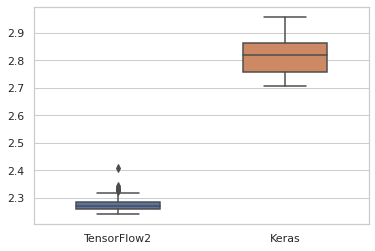

In [15]:
sns.boxplot(data= cpu_test, width=0.5, whis=1.5)

KS TEST

In [16]:
tf = cpu_test.TensorFlow2
print(stats.kstest(tf, 'norm'))

KstestResult(statistic=0.987436479413826, pvalue=1.6299172916412595e-190)


In [17]:
kr = cpu_test.Keras
print(stats.kstest(kr, 'norm'))

KstestResult(statistic=0.9966082922548635, pvalue=2.2022788593645283e-247)


In [18]:
print(stats.wilcoxon(tf,kr))

WilcoxonResult(statistic=0.0, pvalue=3.896559845095909e-18)


#Test GPU

In [19]:
from google.colab import files
uploaded = files.upload()
gpu_test = pd.read_csv('test_gpu2.csv', sep=',', encoding='utf-8')

Saving test_gpu2.csv to test_gpu2.csv


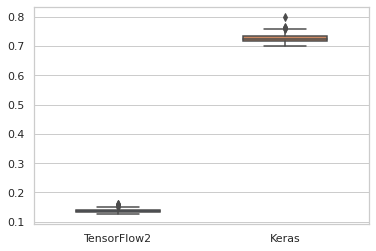

In [20]:
sns.boxplot(data= gpu_test, width=0.5, whis=1.5)

KS TEST

In [21]:
tf = gpu_test.TensorFlow2
print(stats.kstest(tf, 'norm'))

KstestResult(statistic=0.5497718708547179, pvalue=6.556288086329447e-29)


In [22]:
kr = gpu_test.Keras
print(stats.kstest(kr, 'norm'))

KstestResult(statistic=0.7579076806071057, pvalue=2.8859178234070954e-60)


In [23]:
print(stats.wilcoxon(tf,kr))

WilcoxonResult(statistic=0.0, pvalue=3.896559845095909e-18)
